In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime

In [2]:
company= 'INFY.NS'
endDate= '2023-01-26'

In [3]:
df= yf.download(company, period='max', end= endDate)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.519068,204800
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.516969,204800
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.520468,102400
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.517032,307200
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.510924,51200
...,...,...,...,...,...,...
2023-01-19,1539.900024,1549.550049,1526.150024,1538.900024,1498.332764,6165284
2023-01-20,1538.000000,1545.000000,1524.000000,1525.550049,1485.334595,6496429
2023-01-23,1535.000000,1553.300049,1528.099976,1548.000000,1507.192749,4855020


In [4]:
trainSet= df.iloc[:, 1:2].values

In [5]:
df.shape

(6811, 6)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

In [7]:
trainingSetScaled= scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [8]:
xTRAIN = []
yTRAIN = []

for i in range(100, len(trainingSetScaled)):
    xTRAIN.append(trainingSetScaled[i-60:i, 0])
    yTRAIN.append(trainingSetScaled[i, 0])
    
xTRAIN, yTRAIN= np.array(xTRAIN), np.array(yTRAIN)

In [9]:
xTRAIN= np.reshape(xTRAIN, newshape=(xTRAIN.shape[0], xTRAIN.shape[1], 1))

In [10]:
trainingSetScaled.shape

(6811, 1)

In [11]:
xTRAIN.shape

(6711, 60, 1)

In [12]:
yTRAIN.shape

(6711,)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [40]:
regressor= keras.models.Sequential([
    keras.layers.LSTM(units=384, return_sequences= True, input_shape= (xTRAIN.shape[1], 1)),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=256, return_sequences= True), 
    keras.layers.Dropout(rate= 0.3),
    keras.layers.LSTM(units=128), 
    keras.layers.Dropout(rate= 0.4),
    keras.layers.Dense(units= 1)
])

In [41]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 384)           592896    
                                                                 
 dropout_3 (Dropout)         (None, 60, 384)           0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 256)           656384    
                                                                 
 dropout_4 (Dropout)         (None, 60, 256)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [42]:
regressor.compile(optimizer= 'adam', loss= keras.losses.mean_squared_error)

In [43]:
regressor.fit(x= xTRAIN, y=yTRAIN, batch_size= 32, epochs= 150)

Epoch 1/150
210/210 [==============================] - 9s 28ms/step - loss: 0.0040
Epoch 2/150
210/210 [==============================] - 6s 28ms/step - loss: 0.0011
Epoch 3/150
210/210 [==============================] - 6s 28ms/step - loss: 0.0011
Epoch 4/150
210/210 [==============================] - 6s 28ms/step - loss: 9.0340e-04
Epoch 5/150
210/210 [==============================] - 6s 29ms/step - loss: 8.3015e-04
Epoch 6/150
210/210 [==============================] - 6s 27ms/step - loss: 7.0407e-04
Epoch 7/150
210/210 [==============================] - 6s 27ms/step - loss: 9.2127e-04
Epoch 8/150
210/210 [==============================] - 6s 27ms/step - loss: 7.1631e-04
Epoch 9/150
210/210 [==============================] - 6s 28ms/step - loss: 7.2029e-04
Epoch 10/150
210/210 [==============================] - 6s 29ms/step - loss: 6.8044e-04
Epoch 11/150
210/210 [==============================] - 6s 29ms/step - loss: 6.5999e-04
Epoch 12/150
210/210 [==============================]

In [44]:
prdctn= regressor.predict(xTRAIN)

210/210 [==============================] - 3s 10ms/step


regressor.save(f"../model/exports/{company}/")

In [45]:
testDF= yf.download(company, period='1d', start=endDate, end=datetime.datetime.now())
testDF

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,1546.000000,1550.949951,1507.400024,1519.150024,1479.103271,6209955
2023-01-30,1528.800049,1544.000000,1520.000000,1538.800049,1498.235352,6964719
2023-01-31,1548.900024,1548.900024,1513.000000,1533.750000,1493.318481,9448126
2023-02-01,1542.199951,1555.050049,1528.050049,1551.099976,1510.211060,6194199
2023-02-02,1552.000000,1586.949951,1552.000000,1583.750000,1542.000488,6916834
...,...,...,...,...,...,...
2023-06-05,1304.000000,1309.449951,1297.300049,1304.500000,1304.500000,5002553
2023-06-06,1288.599976,1288.599976,1273.000000,1279.000000,1279.000000,10008100
2023-06-07,1290.500000,1294.000000,1282.500000,1288.949951,1288.949951,5397578


In [46]:
realSP= testDF['Close'].values

In [47]:
dfTotal= pd.concat((df['Open'], testDF['Open']), axis=0)

In [48]:
modelInp= dfTotal[len(dfTotal)-len(testDF)-60:].values

In [49]:
modelInp= modelInp.reshape(-1,1)

In [50]:
modelInp= scaler.transform(modelInp)

In [51]:
xTEST= []

for i in range(60, len(modelInp)):
    xTEST.append(modelInp[i-60:i, 0])

xTEST= np.array(xTEST)

In [52]:
xTEST.shape

(90, 60)

In [53]:
xTEST= np.reshape(xTEST, newshape= (xTEST.shape[0], xTEST.shape[1], 1))

In [54]:
#pred = pred[..., 0]

In [55]:
pred= regressor.predict(xTEST)

3/3 [==============================] - 0s 77ms/step


In [56]:
pred= scaler.inverse_transform(pred)

In [57]:
pred.shape

(90, 1)

In [58]:
import matplotlib.pyplot as plt

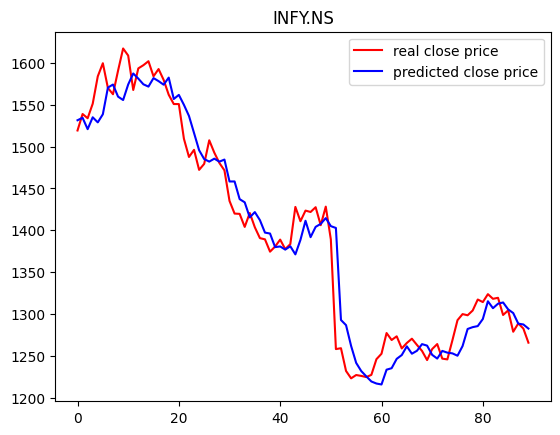

In [59]:
plt.plot(realSP, color= 'r', label= 'real close price')
plt.plot(pred, color= 'b', label= 'predicted close price')
plt.title(company)
plt.legend()
plt.show()

In [34]:
realData= [modelInp[len(modelInp)+1-60:len(modelInp+1), 0]]

In [35]:
realData= np.array(realData)

In [36]:
realData= np.reshape(realData, newshape=(realData.shape[0], realData.shape[1], 1))

In [37]:
prediction= regressor.predict(realData)

1/1 [==============================] - 1s 947ms/step


In [38]:
prediction= scaler.inverse_transform(prediction)

In [39]:
prediction

array([[1335.9021]], dtype=float32)

# Load your Keras model
#model = tf.keras.models.load_model('../model/exports/ITC.NS/')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_lower_tensor_list_ops = False  # Disable lowering of tensor list ops
tflite_model = converter.convert()

# Save the converted TensorFlow Lite model
tflite_model_path = f"../../stocksense-api/stockSenseAPI/stockSenseAPI/exports/{company}.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)